In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context("poster")

In [3]:
df = pd.read_csv("../data/TrainSet.txt", header=0, sep="\t")
df.head()

,Compound Identifier,Odor,Replicate,Intensity,Dilution,subject #,INTENSITY/STRENGTH,VALENCE/PLEASANTNESS,BAKERY,SWEET,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
0,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",1,7,62.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126,4-Hydroxybenzaldehyde,NaN,high,01.Oct,1,37,60.0,0.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",2,55,89.0,0.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,126,4-Hydroxybenzaldehyde,NaN,high,01.Oct,2,64,71.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",3,89,68.0,0.0,62.0,...,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = df[df.Replicate.isna()].drop("Replicate", axis=1)

In [7]:
target_col = "INTENSITY/STRENGTH"
# target_col = "VALENCE/PLEASANTNESS"

df_low = df[df["Intensity"] == "low "].loc[:,["subject #", "Compound Identifier", target_col]]
df_high = df[df["Intensity"] == "high "].loc[:,["subject #", "Compound Identifier", target_col]]

df_diff = df_low.copy(deep=True)
df_diff[target_col] = df_diff[target_col] - np.array(df_high[target_col])

In [8]:
df_high_wide = df_high.pivot(index="subject #", columns="Compound Identifier", values=target_col)
df_low_wide = df_low.pivot(index="subject #", columns="Compound Identifier", values=target_col)
df_diff_wide = df_diff.pivot(index="subject #", columns="Compound Identifier", values=target_col)

print(df_diff_wide.shape)
df_diff_wide.head(n=10)

(49, 338)


Compound Identifier,126,176,177,196,239,240,241,244,261,263,...,5363388,5363491,5364729,5365027,5365049,5366244,5367706,5368076,6429333,6999977
subject #,,,,,,,,,,,,,,,,,,,,,
1,-30,0,3,-41,21,-73,79,-5,-11,-15,...,-53,-47,-20,11,-59,0,52,-60,0,5
2,-9,-83,-23,0,0,-30,0,-9,-25,-54,...,-43,0,2,-20,-84,0,0,-72,0,-59
3,89,-69,-83,-40,-64,-51,64,-54,-33,11,...,-66,0,-60,0,-17,-62,-2,0,71,0
4,-71,20,-90,-91,-69,-4,0,-5,-93,-56,...,-12,21,0,0,-65,-13,-69,-10,-1,-100
5,-58,-67,-60,0,0,-84,-18,7,-7,0,...,-68,0,-50,-63,-68,-54,0,-69,0,0
6,0,0,0,0,0,-88,0,0,-17,0,...,-53,0,4,0,0,-57,9,0,0,13
7,-12,0,-17,-21,-22,-85,-2,-28,-11,3,...,-3,14,-10,-2,-94,-90,-79,-31,-66,-5
8,-5,-57,-33,-45,-4,-57,19,-79,-56,0,...,-40,0,17,-82,-50,-66,-54,-50,0,-32
9,-100,-17,-100,0,-31,-100,0,-47,-100,-25,...,-100,0,-61,-62,-30,-43,0,0,0,-54


In [19]:
from sklearn.preprocessing import StandardScaler

import umap
import hdbscan

In [20]:
df_low_wide_scaled = pd.DataFrame(StandardScaler().fit_transform(df_low_wide), columns=df_diff_wide.columns, index=df_low_wide.index)
df_high_wide_scaled = pd.DataFrame(StandardScaler().fit_transform(df_high_wide), columns=df_diff_wide.columns, index=df_high_wide.index)
df_diff_wide_scaled = pd.DataFrame(StandardScaler().fit_transform(df_diff_wide), columns=df_diff_wide.columns, index=df_diff_wide.index)

print(df_low_wide_scaled.shape)
df_low_wide_scaled.describe()

(49, 338)


Compound Identifier,126,176,177,196,239,240,241,244,261,263,...,5363388,5363491,5364729,5365027,5365049,5366244,5367706,5368076,6429333,6999977
count,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,...,4.900000e+01,49.000000,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,49.000000,4.900000e+01,4.900000e+01,4.900000e+01
mean,4.531523e-18,1.246169e-17,3.851794e-17,-2.379049e-17,4.446557e-17,-2.265761e-17,2.945490e-17,-8.270029e-17,-9.063045e-17,-7.930164e-18,...,6.344132e-17,0.000000,-1.166867e-16,-9.402909e-17,-3.625218e-17,1.586033e-17,0.000000,7.250436e-17,-3.639379e-17,-2.718914e-17
std,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,...,1.010363e+00,1.010363,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363,1.010363e+00,1.010363e+00,1.010363e+00
min,-8.957639e-01,-4.004062e-01,-5.802930e-01,-5.131677e-01,-8.058542e-01,-6.379282e-01,-4.156710e-01,-1.410572e+00,-1.319961e+00,-4.120736e-01,...,-9.802436e-01,-0.541838,-1.551294e+00,-1.303788e+00,-4.980787e-01,-3.764504e-01,-0.505700,-5.792515e-01,-3.724343e-01,-5.999372e-01
25%,-8.957639e-01,-4.004062e-01,-5.802930e-01,-5.131677e-01,-8.058542e-01,-6.379282e-01,-4.156710e-01,-1.023454e+00,-1.257830e+00,-4.120736e-01,...,-9.802436e-01,-0.541838,-6.411557e-01,-1.164604e+00,-4.980787e-01,-3.764504e-01,-0.505700,-5.792515e-01,-3.724343e-01,-5.999372e-01
50%,-2.780724e-01,-4.004062e-01,-5.802930e-01,-5.131677e-01,-8.058542e-01,-6.379282e-01,-4.156710e-01,1.378970e-01,3.265032e-01,-4.120736e-01,...,-4.306093e-01,-0.541838,6.672972e-02,3.942609e-01,-4.980787e-01,-3.764504e-01,-0.505700,-5.792515e-01,-3.724343e-01,-5.999372e-01
75%,7.029670e-01,-4.004062e-01,1.759399e-01,2.329812e-01,6.791866e-01,2.965244e-02,-3.135764e-01,7.713615e-01,8.856796e-01,-3.035166e-01,...,9.129415e-01,0.075605,7.071975e-01,8.118139e-01,-2.322197e-01,-3.764504e-01,-0.223046,3.616321e-01,-3.724343e-01,1.400311e-01
max,2.338033e+00,4.174638e+00,3.604196e+00,4.635259e+00,2.278461e+00,2.935592e+00,4.280682e+00,1.791943e+00,1.444856e+00,4.255878e+00,...,2.073281e+00,3.780266,1.819589e+00,1.479899e+00,3.755665e+00,4.702056e+00,2.697705,3.706996e+00,3.783816e+00,2.595381e+00


In [21]:
reducer_high = umap.UMAP(random_state=42, n_components=10, min_dist=0)
reducer_high_plot = umap.UMAP(random_state=42, n_components=2)
embedding_high = reducer_high.fit_transform(df_high_wide_scaled)
embedding_high_plot = reducer_high_plot.fit_transform(df_high_wide_scaled)

reducer_low = umap.UMAP(random_state=42, n_components=10, min_dist=0)
reducer_low_plot = umap.UMAP(random_state=42, n_components=2)
embedding_low = reducer_high.fit_transform(df_low_wide_scaled)
embedding_low_plot = reducer_high_plot.fit_transform(df_low_wide_scaled)

reducer_diff = umap.UMAP(random_state=42, n_components=10, min_dist=0)
reducer_diff_plot = umap.UMAP(random_state=42, n_components=2)
embedding_diff = reducer_high.fit_transform(df_diff_wide_scaled)
embedding_diff_plot = reducer_high_plot.fit_transform(df_diff_wide_scaled)

(49, 2)

In [127]:
from sklearn.cluster import DBSCAN, KMeans
hdbscan.HDBSCAN()

clustering_high = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=6).fit_predict(embedding_high)
clustering_low = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5).fit_predict(embedding_low)
clustering_diff = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=3).fit_predict(embedding_diff)

def cluster_distributions(labels: np.array, level: str) -> None:
    counts = np.unique(labels, return_counts=True)
    print(f"Distribution across HDBSCAN clusters for '{level}' data")
    print(list(zip(counts[0], (counts[1] / np.sum(counts[1]) * 100))))
    
cluster_distributions(clustering_high, level="high")
cluster_distributions(clustering_low, level="low")
cluster_distributions(clustering_diff, level="diff")


Distribution across HDBSCAN clusters for 'high' data
[(-1, 4.081632653061225), (0, 46.93877551020408), (1, 48.97959183673469)]
Distribution across HDBSCAN clusters for 'low' data
[(-1, 16.3265306122449), (0, 38.775510204081634), (1, 44.89795918367347)]
Distribution across HDBSCAN clusters for 'diff' data
[(-1, 22.448979591836736), (0, 34.69387755102041), (1, 20.408163265306122), (2, 22.448979591836736)]


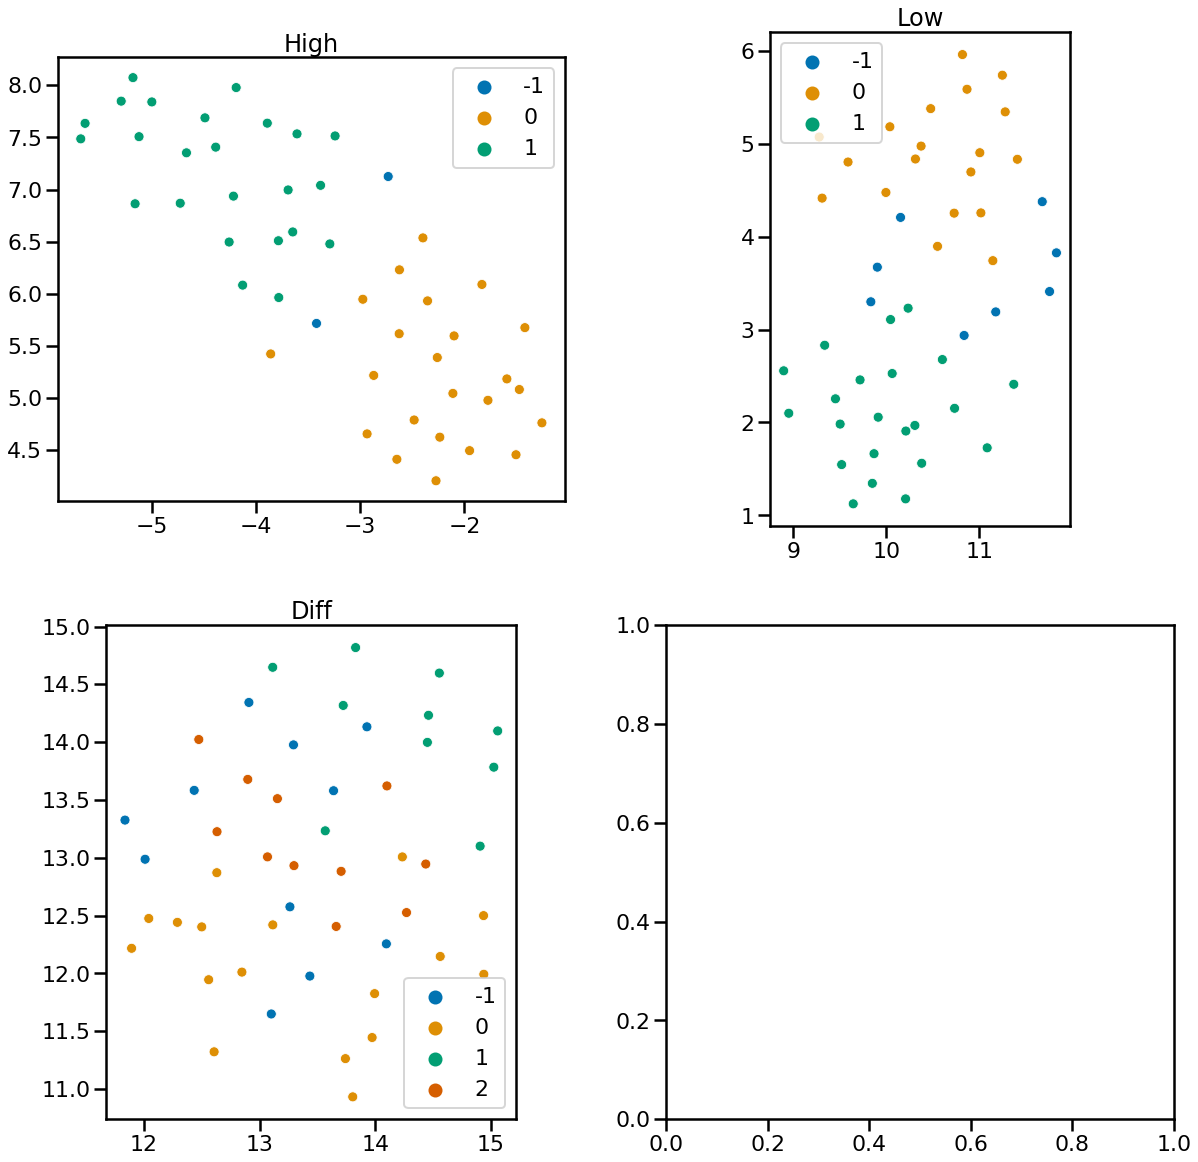

In [159]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(20, 20))

sns.scatterplot(x=embedding_high_plot[:, 0], y=embedding_high_plot[:, 1], hue=clustering_high, palette="colorblind", s=100, ax=ax1[0])
ax1[0].set_title("High")
ax1[0].set_aspect('equal')

sns.scatterplot(x=embedding_low_plot[:, 0], y=embedding_low_plot[:, 1], hue=clustering_low, palette="colorblind", s=100, ax=ax1[1])
ax1[1].set_title("Low")
ax1[1].set_aspect('equal')

sns.scatterplot(x=embedding_diff_plot[:, 0], y=embedding_diff_plot[:, 1], hue=clustering_diff, palette="colorblind", s=100, ax=ax2[0])
ax2[0].set_title("Diff")
ax2[0].set_aspect('equal')

plt.show()

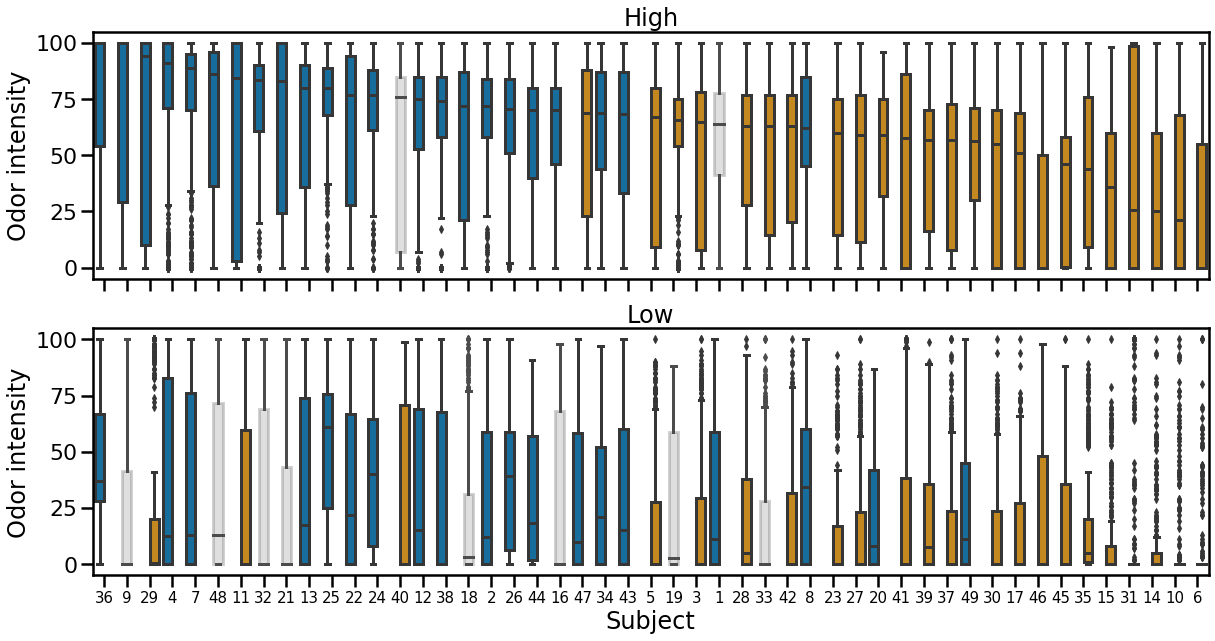

In [165]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True, sharey=True)

subject_order = df_high.groupby("subject #").median().sort_values(by=target_col, ascending=False).index

subject_cluster_mapping_high = pd.DataFrame({"label": clustering_high, "clustered": clustering_high >= 0}, index=df_high_wide.index)
subject_cluster_mapping_diff = pd.DataFrame({"label": clustering_diff, "clustered": clustering_diff >= 0}, index=df_diff_wide.index)
subject_cluster_mapping_low = pd.DataFrame({"label": clustering_low, "clustered": clustering_low >= 0}, index=df_low_wide.index)

df_plot_high = pd.merge(df_high, subject_cluster_mapping_high, on='subject #',how='left')

sns.boxplot(
    data=df_plot_high[df_plot_high["clustered"] != True],
    order=subject_order,
    x = 'subject #', 
    y = target_col,
    ax=ax1,
    color=(0.5, 0.5, 0.5),
    boxprops=dict(alpha=.25),
    width=.4
)

sns.boxplot(
    data=df_plot_high[df_plot_high["clustered"] == True],
    order=subject_order,
    x = 'subject #', 
    y = target_col,
    ax=ax1,
    hue="label",
    palette="colorblind"
)
ax1.set_title("High", fontsize=24)
ax1.set_xlabel("")
ax1.legend_.remove()

df_plot_low = pd.merge(df_low, subject_cluster_mapping_low, on='subject #',how='left')

sns.boxplot(
    data=df_plot_low[df_plot_low["clustered"] != True],
    order=subject_order,
    x = 'subject #', 
    y = target_col,
    ax=ax2,
    color=(0.5, 0.5, 0.5),
    boxprops=dict(alpha=.25),
    width=.4
)
ax1.set(title="High", ylabel="Odor intensity")

sns.boxplot(
    data=df_plot_low[df_plot_low["clustered"] == True],
    order=subject_order,
    x = 'subject #', 
    y = target_col,
    ax=ax2,
    hue="label",
    palette="colorblind"
)
ax2.set(title="Low", xlabel="Subject", ylabel="Odor intensity")
ax2.set_xticklabels(labels=subject_order, fontsize=15)
ax2.legend_.remove()


plt.show()

In [9]:
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

df_t_test = {"Compound Identifier": [], "pval": []}
for name, group in df_high.groupby("Compound Identifier"):
    df_t_test["Compound Identifier"].append(name)
    pval = ttest_rel(
        a=df_low[df_low["Compound Identifier"] == name][target_col],
        b=group[target_col],          
        alternative="less").pvalue
    df_t_test["pval"].append(pval)

fdr = multipletests(df_t_test["pval"], is_sorted=False, method="fdr_bh", alpha=0.05)

df_t_test["reject"] = fdr[0]
df_t_test["pval_cor"] = fdr[1]
df_t_test = pd.DataFrame(df_t_test).set_index("Compound Identifier")
df_t_test.head(n=10)

,pval,reject,pval_cor
Compound Identifier,,,
126,8.800371e-05,True,1.239386e-04
176,3.411397e-02,True,3.843508e-02
177,7.552797e-06,True,1.171030e-05
196,1.446732e-04,True,1.963837e-04
239,6.720340e-02,False,7.447458e-02
240,1.305073e-21,True,5.513932e-20
241,7.916358e-01,False,8.132915e-01
244,9.577619e-09,True,2.088539e-08
261,1.067952e-09,True,2.714044e-09


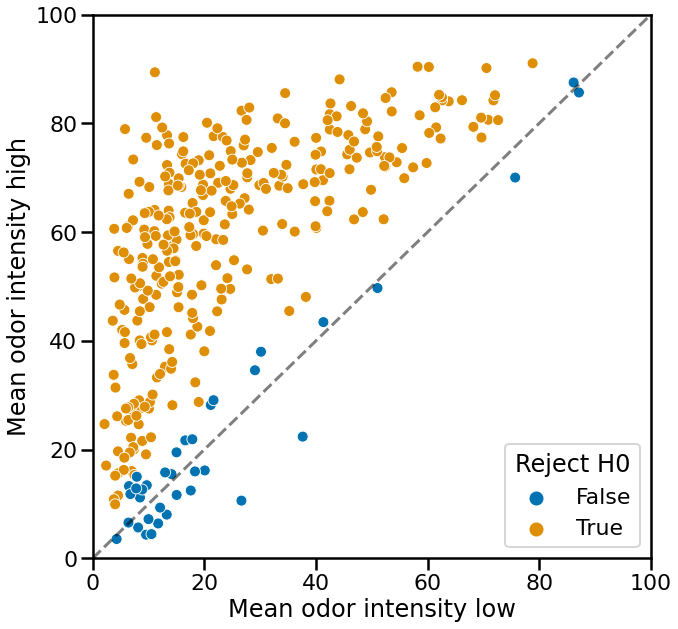

In [171]:
fig = plt.figure(figsize=(10, 10))

df_scatter = pd.DataFrame({"low": df_low_wide.mean(axis=0), "high": df_high_wide.mean(axis=0)}, index=df_low_wide.columns)
df_scatter = pd.merge(df_scatter, df_t_test, left_index=True, right_index=True)

ax = sns.lineplot(
    x=np.arange(0, 100, 0.01),
    y=np.arange(0, 100, 0.01),
    color="black",
    linestyle="dashed",
    alpha=0.5
)

sns.scatterplot(
    x=df_scatter["low"],
    y=df_scatter["high"],
    s=120,
    hue=df_scatter["reject"],
    palette="colorblind"
)
ax.set(xlabel="Mean odor intensity low", ylabel="Mean odor intensity high")
ax.legend(title="Reject H0")

plt.xlim(0, 100)
plt.ylim(0, 100)

plt.show()

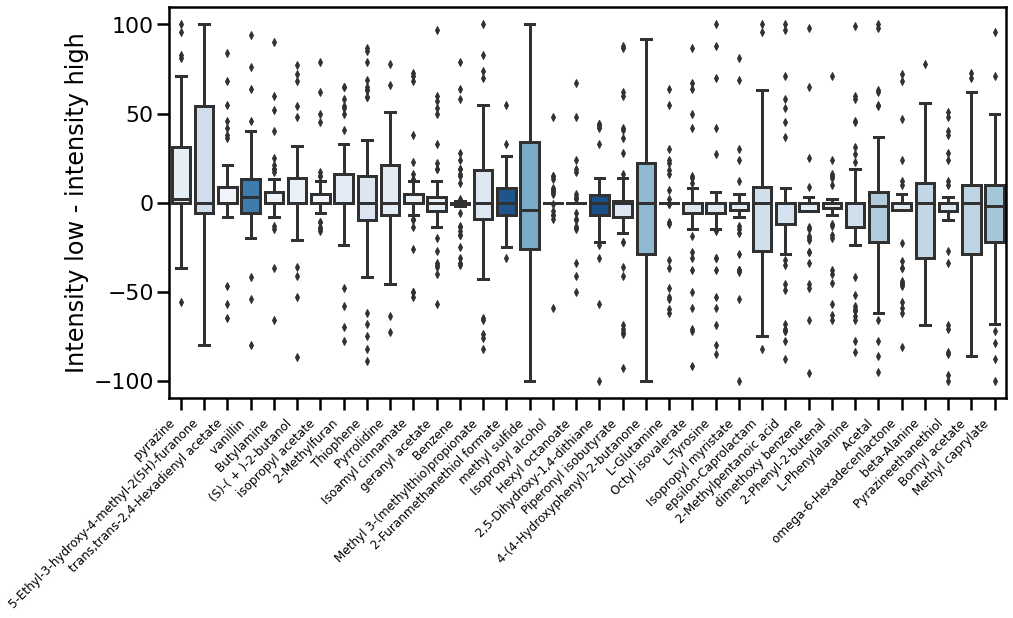

In [233]:
from matplotlib import cm
from matplotlib import colors

df_scatter["diff"] = df_scatter["low"] - df_scatter["high"]
df_insig = df_scatter[df_scatter['reject'] == False].sort_values(by='diff', ascending=False)
# df.sort_values()
df_odor_id_mapping = (df[["Compound Identifier", "Odor"]]
                      .drop_duplicates()
                      .set_index("Compound Identifier"))

df_insig = pd.merge(
    df_insig, 
    df_odor_id_mapping, 
    how="left", 
    left_index=True, 
    right_index=True
)

fig = plt.figure(figsize=(15, 8))

ax = sns.boxplot(
    data = df_diff_wide[df_insig.index],
    palette=cm.Blues(df_insig["high"]/100)
)
ax.set(xlabel="", ylabel="Intensity low - intensity high")
ax.set_xticklabels(df_insig["Odor"], fontsize=12)
fig.autofmt_xdate(rotation=45)

plt.show()


In [199]:
df_insig

,low,high,pval,reject,pval_cor,diff,Odor
Compound Identifier,,,,,,,
9261,26.653061,10.612245,0.998840,False,0.998840,16.040816,pyrazine
61199,37.632653,22.387755,0.989739,False,0.992675,15.244898,5-Ethyl-3-hydroxy-4-methyl-2(5H)-furanone
5363491,10.530612,4.448980,0.950759,False,0.959275,6.081633,"trans,trans-2,4-Hexadienyl acetate"
1183,75.714286,70.040816,0.919164,False,0.932965,5.673469,vanillin
8007,11.734694,6.408163,0.950761,False,0.959275,5.326531,Butylamine
444683,13.265306,8.040816,0.895034,False,0.911209,5.224490,(S)-( + )-2-butanol
7915,9.571429,4.346939,0.976672,False,0.982486,5.224490,isopropyl acetate
10797,17.571429,12.469388,0.883955,False,0.902649,5.102041,2-Methylfuran
8030,20.081633,16.163265,0.746649,False,0.774134,3.918367,Thiophene
